In [1]:
import numpy as np
from scipy.interpolate import CubicSpline

time_hours = np.array([0, 2, 4, 6, 8, 10])

population_x100 = np.array([5, 7, 11, 20, 34, 57])

cs = CubicSpline(time_hours, population_x100)


coefficients = cs.c

# The equation for the i-th segment is:
# S_i(t) = c3 * (t - t_i)^3 + c2 * (t - t_i)^2 + c1 * (t - t_i) + c0

for i in range(len(time_hours) - 1):
    t_start = time_hours[i]
    t_end = time_hours[i+1]
    
    c3 = coefficients[0, i]
    c2 = coefficients[1, i]
    c1 = coefficients[2, i]
    c0 = coefficients[3, i]
    
    print(f"--- Segment {i+1} (Interval: {t_start} > t > {t_end}) ---")
    
    print(f"Cubic Coefficient (c3): {c3: .6f}")
    print(f"Quadratic Coefficient (c2): {c2: .6f}")
    print(f"Linear Coefficient (c1): {c1: .6f}")
    print(f"Constant Coefficient (c0): {c0: .6f} (This is P({t_start}))\n")

    latex_equation = (
        f"P(t) = {c3:.6f} (t - {t_start})^3 + "
        f"{c2:.6f} (t - {t_start})^2 + "
        f"{c1:.6f} (t - {t_start}) + "
        f"{c0:.6f}"
    )
    print(f"Equation: {latex_equation}\n")


--- Segment 1 (Interval: 0 > t > 2) ---
Cubic Coefficient (c3):  0.084722
Quadratic Coefficient (c2): -0.258333
Linear Coefficient (c1):  1.177778
Constant Coefficient (c0):  5.000000 (This is P(0))

Equation: P(t) = 0.084722 (t - 0)^3 + -0.258333 (t - 0)^2 + 1.177778 (t - 0) + 5.000000

--- Segment 2 (Interval: 2 > t > 4) ---
Cubic Coefficient (c3):  0.084722
Quadratic Coefficient (c2):  0.250000
Linear Coefficient (c1):  1.161111
Constant Coefficient (c0):  7.000000 (This is P(2))

Equation: P(t) = 0.084722 (t - 2)^3 + 0.250000 (t - 2)^2 + 1.161111 (t - 2) + 7.000000

--- Segment 3 (Interval: 4 > t > 6) ---
Cubic Coefficient (c3): -0.048611
Quadratic Coefficient (c2):  0.758333
Linear Coefficient (c1):  3.177778
Constant Coefficient (c0):  11.000000 (This is P(4))

Equation: P(t) = -0.048611 (t - 4)^3 + 0.758333 (t - 4)^2 + 3.177778 (t - 4) + 11.000000

--- Segment 4 (Interval: 6 > t > 8) ---
Cubic Coefficient (c3):  0.109722
Quadratic Coefficient (c2):  0.466667
Linear Coefficient (

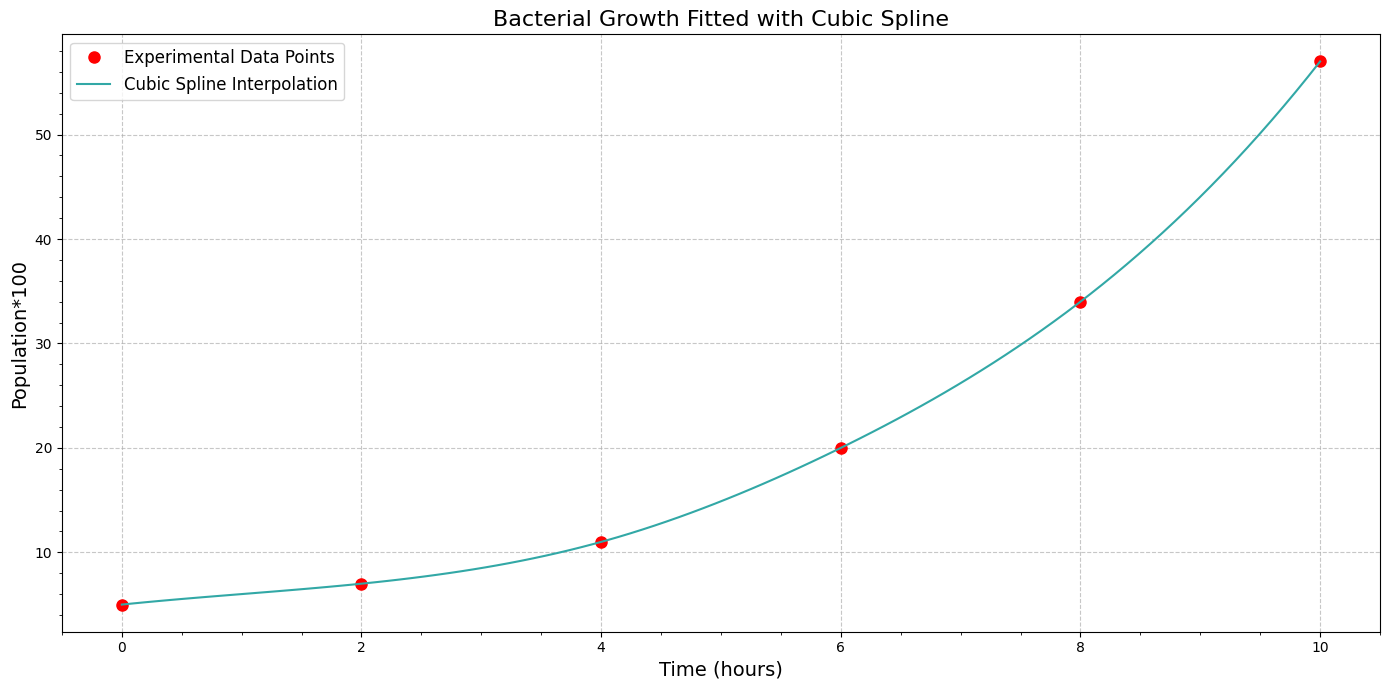

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline


# Time in hours (x-axis)
time = np.array([0, 2, 4, 6, 8, 10])

# Population (raw values from the table)
population_scaled = np.array([5, 7, 11, 20, 34, 57])

cs = CubicSpline(time, population_scaled)

time_smooth = np.linspace(time.min(), time.max(), 100)

population_spline_scaled = cs(time_smooth)

plt.figure(figsize=(14, 7))

# Plot the original experimental data points (scatter plot)
plt.plot(time, population_scaled, 'o', label='Experimental Data Points', color='red', markersize=8)

# Plot the cubic spline interpolation curve
plt.plot(time_smooth, population_spline_scaled, '-', label='Cubic Spline Interpolation', color='#32a8a6')

# Add Plot Labels and Title
plt.title('Bacterial Growth Fitted with Cubic Spline', fontsize=16)
plt.xlabel('Time (hours)', fontsize=14)
plt.ylabel("Population*100", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.minorticks_on()
plt.tight_layout()
plt.show()

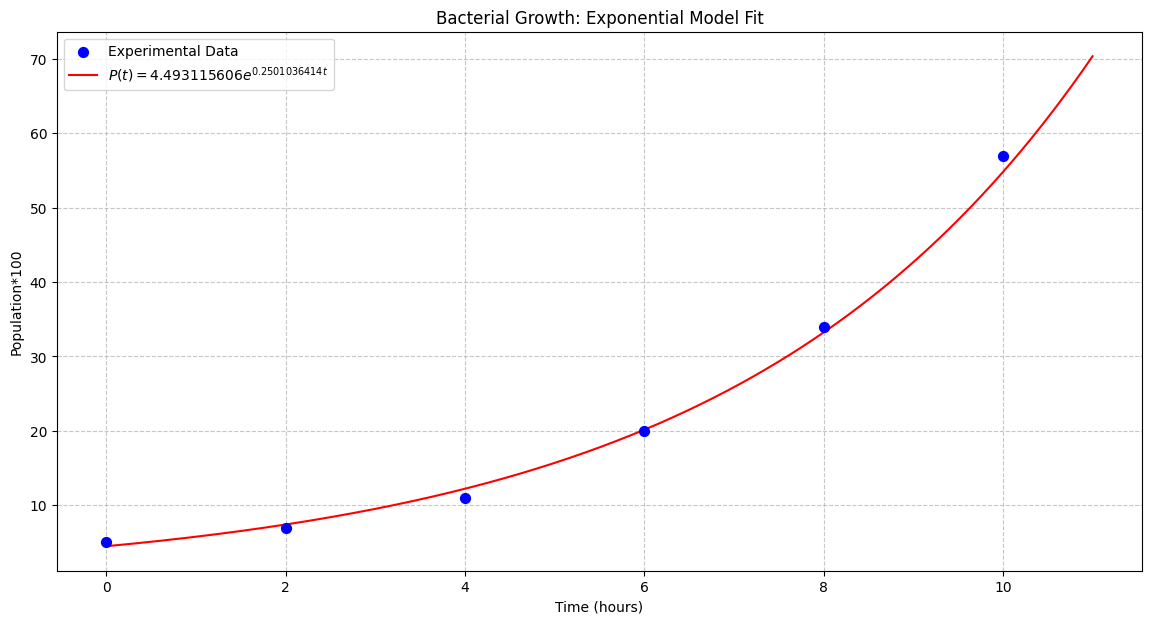

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Real Data
t_data = np.array([0, 2, 4, 6, 8, 10])
P_data = np.array([5, 7, 11, 20, 34, 57])

# Fitted Equation Parameters
C = 4.493115606
k = 0.2501036414

# Define the exponential function
def exponential_model(t, C, k):
    return C * np.exp(k * t)

t_curve = np.linspace(0, 11, 1000)
P_curve = exponential_model(t_curve, C, k)


plt.figure(figsize=(14, 7))
plt.scatter(t_data, P_data, color='blue', zorder=5, label='Experimental Data', marker='o', s=50)
plt.plot(t_curve, P_curve, color='red', label=f'$P(t) = {C}e^{{{k}t}}$')

plt.title('Bacterial Growth: Exponential Model Fit')
plt.xlabel('Time (hours)')
plt.ylabel('Population*100')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()